In [8]:
# Fake News Detection – Exploratory Data Analysis and Baseline

In [11]:
# ============================================================
# B1. Data Acquisition and Loading
# ============================================================

"""
Dataset Source:
---------------
The dataset used in this project is the "Fake News Detection" dataset,
originally published on Kaggle by George McIntire, Kaggle user 'clmentbisaillon', 
and J P. The dataset contains two CSV files:

    • Fake.csv – news articles labeled as fake
    • True.csv – news articles labeled as real

Each file contains the text of the article, its title, the publication date,
and the subject category.

Why this dataset?
-----------------
This dataset is widely used for binary text classification research and
serves as a clean benchmark for testing NLP methods such as TF-IDF, SVM,
Logistic Regression, and LSTM-based neural networks.
"""

import pandas as pd
import os

print(os.listdir())
# Define paths

raw_data_path = "../../data/raw/"
processed_data_path = "../../data/processed/"

# Load datasets
true_df = pd.read_csv("../../data/raw/True.csv")
fake_df = pd.read_csv("../../data/raw/Fake.csv")

print("True News shape:", true_df.shape)
print("Fake News shape:", fake_df.shape)

# Add binary labels
true_df["label"] = 1   # Real news
fake_df["label"] = 0   # Fake news

# Combine datasets into one dataframe
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)
print("Combined Dataset Shape:", df.shape)

# Display metadata
print("\n=== Dataset Info ===")
df.info()
df.head()

# Save a small sample for testing reproducibility
sample = df.sample(500, random_state=42)
sample.to_csv(os.path.join(processed_data_path, "sample_data.csv"), index=False)


['.ipynb_checkpoints', 'PreliminaryAnalysisAndBaseline.ipynb', 'fake_news_pipeline.ipynb', 'Results.ipynb']
True News shape: (21417, 4)
Fake News shape: (23481, 4)
Combined Dataset Shape: (44898, 5)

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


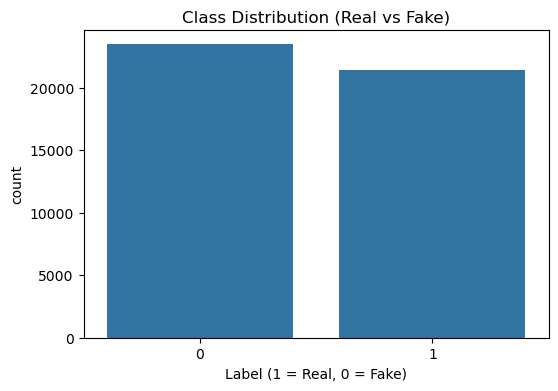

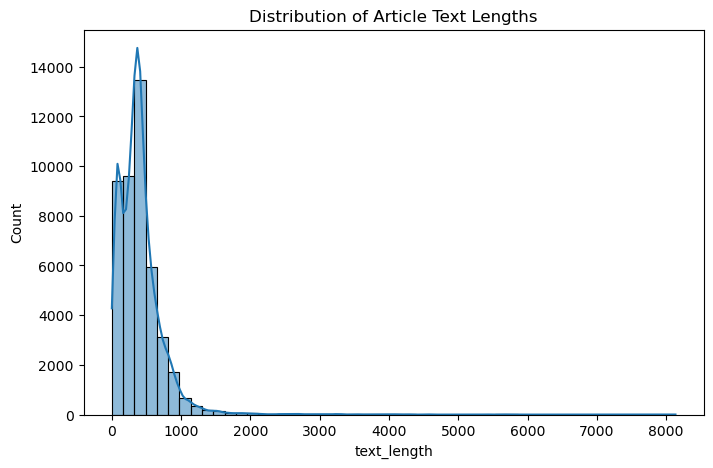

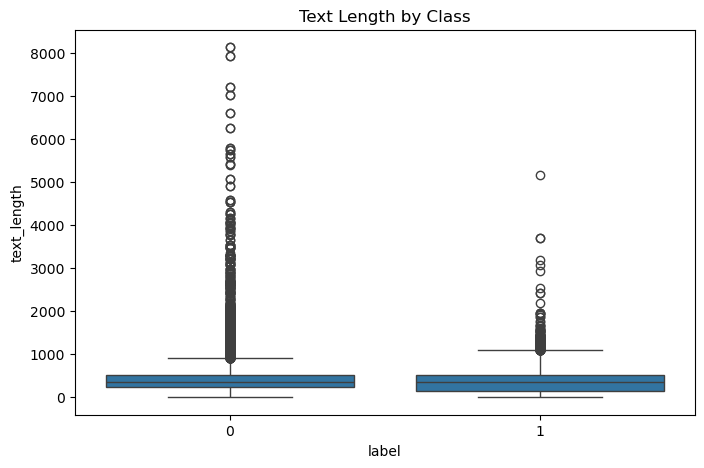

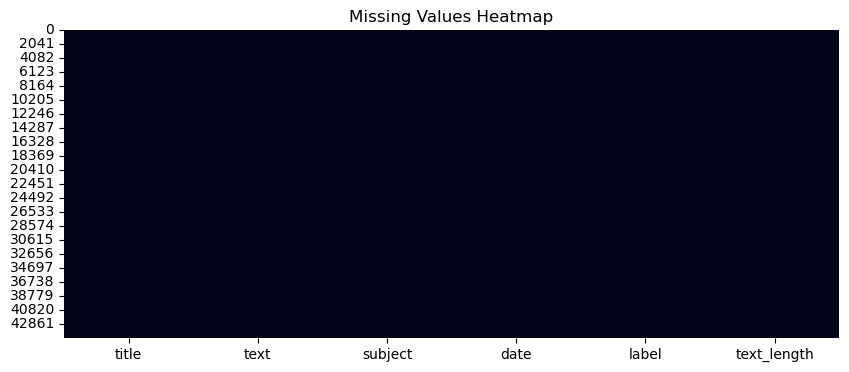

In [16]:
# ============================================================
# B2. Exploratory Data Analysis (EDA)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

REPO_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../.."))
FIGURES_PATH = os.path.join(REPO_ROOT, "figures")
os.makedirs(FIGURES_PATH, exist_ok=True)

df["text_length"] = df["text"].astype(str).apply(lambda x: len(x.split()))

# ---------------------------------
# Class distribution
# ---------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df)
plt.title("Class Distribution (Real vs Fake)")
plt.xlabel("Label (1 = Real, 0 = Fake)")
plt.savefig(os.path.join(FIGURES_PATH, "class_distribution.png"), dpi=300)
plt.show()

# ---------------------------------
# Distribution of text lengths
# ---------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Article Text Lengths")
plt.savefig(os.path.join(FIGURES_PATH, "text_length_distribution.png"), dpi=300)
plt.show()

# ---------------------------------
# Text length by class
# ---------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="text_length", data=df)
plt.title("Text Length by Class")
plt.savefig(os.path.join(FIGURES_PATH, "text_length_by_class.png"), dpi=300)
plt.show()

# ---------------------------------
# Missing values heatmap
# ---------------------------------
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.savefig(os.path.join(FIGURES_PATH, "missing_values_heatmap.png"), dpi=300)
plt.show()


Baseline Logistic Regression Accuracy: 0.9860801781737194

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



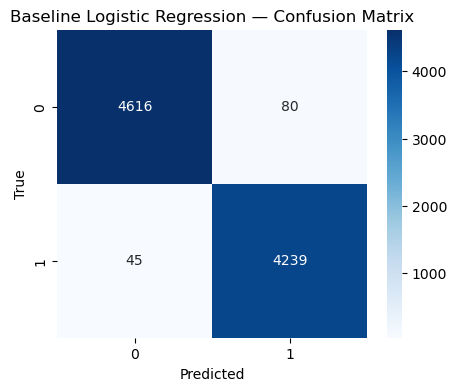

In [18]:
# ============================================================
# B3. Baseline Model: Logistic Regression + TF-IDF
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], 
    test_size=0.2, 
    random_state=42,
    stratify=df["label"]
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Baseline Model — Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_tfidf, y_train)
y_pred = log_reg.predict(X_test_tfidf)

# Metrics
print("Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Baseline Logistic Regression — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig(os.path.join(FIGURES_PATH, "baseline_confusion_matrix.png"), dpi=300)
plt.show()
